# AA1 - TRABAJO PRACTICO INTEGRADOR

Integrantes:

* Agustín Arenas


Tematica:

En este trabajo se desarrollara la predicción de la variable objetivo "RainfallTomorrow" (Regresion) y "RainTomorrow" (Clasificación) a traves de diferentes tecnicas de Machine Learning. Se dispone de un dataset con información de diferentes variables de indole climatica, los datos son registros correspondientes a Australia.

## BIBLIOTECAS

In [3]:
# Operaciones
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 500)

# Gráficos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Explicabilidad
import shap

# Procesado y Modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, log_loss
from sklearn import metrics

# Warnings
import warnings
warnings.filterwarnings("ignore")


## EXPLORACION DE DATOS Y TRATAMIENTO DEL DF

### ESTRUCTURA GENERAL DEL DF

In [4]:
dft = pd.read_csv("weatherAUS.csv")
dft

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145407,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0


In [5]:
#Descripción general del DF
dft.info()

#Tamaño del dataset (filas, columnas)
dft.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

(145412, 25)

El dataset posee 145412 filas y 25 columnas. Se observa que varias columnas no poseen la misma cantidad de filas con datos, sino que algunas tienen datos faltantes.

### FILTRACION DE DATOS Y MODIFICACION DE COLUMNAS

Se estudiara determinadas ciudades del dataset por lo que se descartaran todas las demas.
Las ciudades de Australia a estudiar son:
Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport

In [6]:

ciudades = ['Adelaide', 'Canberra', 'Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport']

# Filtrar el DataFrame para obtener solo las filas donde la ubicación está en la lista de ciudades
df = dft[dft['Location'].isin(ciudades)]

Por otro lado la columna Unnamed: 0 se eliminara ya que los indices a usar seran los propios del dataframe

In [7]:
df = df.drop("Unnamed: 0", axis=1)

Las lluvias suelen ser del tipo estacional dependiendo la parte del mundo. Por lo que de la columna Date nos quedaremos con la información del mes, que resulta un buen factor representativo de estacionalidades; la misma dara una idea más de la magnitud esperable de lluvias según la estación, no se busca abordarlo en forma de predicción en el tiempo (En el sentido de que la forma de la estacionalidad es estatica y no dinamica en el tiempo).

In [8]:
# Nos quedamos con la información del mes de la columna Date
df['month'] = df.Date.apply(lambda x: str(x).split("-")[1])

df = df.drop("Date", axis=1)

# Modificamos la columna booleana para que se vea en la forma numerica
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})

df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})


Observamos la estacionalidad de nuestras ciudades en estudio

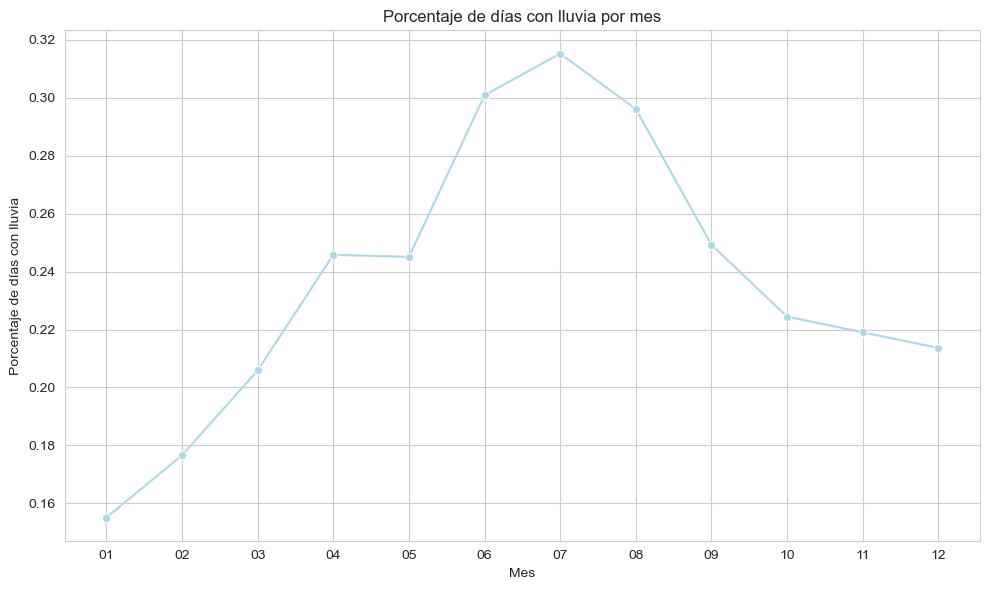

In [9]:
# Grilla y tamaño
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Datos agrupados por mes para la determinación del porcentaje de los dias con lluvia
sns.lineplot(x=df.groupby('month')['RainToday'].mean().index, y=df.groupby('month')['RainToday'].mean().values, marker='o', color='lightblue')

# Añadir etiquetas y título
plt.title('Porcentaje de días con lluvia por mes')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de días con lluvia')

# Añadir etiquetas de meses al eje x
#plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()


La grafica resultante confirma la presencia de un cierto grado de estacionalidad en las precipitaciones de las ciudades de Australia

### ANALIZAMOS VALORES FALTANTES

In [10]:
#Vemos la cantidad de valores NaN por columna
df.isna().sum()

Location               0
MinTemp              570
MaxTemp              558
Rainfall             986
Evaporation         4353
Sunshine            6713
WindGustDir         1645
WindGustSpeed       1642
WindDir9am          1648
WindDir3pm           437
WindSpeed9am         358
WindSpeed3pm         340
Humidity9am          940
Humidity3pm          890
Pressure9am          839
Pressure3pm          829
Cloud9am            9367
Cloud3pm            9550
Temp9am              585
Temp3pm              576
RainToday            986
RainTomorrow         985
RainfallTomorrow     985
month                  0
dtype: int64

Vemos la cantidad de valores NaN por columna en proporción ordenado de mayor a menor

In [11]:
# Serie de valores de mayor a menor
(df.isna().sum()/df.shape[0]).round(2).sort_values(ascending=False)*100


Cloud3pm            34.0
Cloud9am            33.0
Sunshine            24.0
Evaporation         15.0
WindGustDir          6.0
WindGustSpeed        6.0
WindDir9am           6.0
Humidity9am          3.0
Humidity3pm          3.0
RainToday            3.0
Pressure3pm          3.0
Pressure9am          3.0
RainTomorrow         3.0
RainfallTomorrow     3.0
Rainfall             3.0
MinTemp              2.0
WindDir3pm           2.0
Temp9am              2.0
Temp3pm              2.0
MaxTemp              2.0
WindSpeed9am         1.0
WindSpeed3pm         1.0
Location             0.0
month                0.0
dtype: float64

Observando las peores columnas, la cantidad de datos faltantes es menor al 34%. Por lo que si se realiza una imputación de datos se estaria usando el 66% de los datos, lo que se puede considerar un valor acorde para usar la información disponible para completar datos faltantes, la tecnica elegida en cada columna dependera de la presencia o no de outliers y se buscara agrupar según ciertas caracteristicas comunes entre los valores.
Por lo que no se descartara datos, ni se buscara información externa para alguna de las columnas del dataset

### DISTRIBUCION DE LOS DATOS EN LAS DIFERENTES CIUDADES

Distribución de los datos respecto a las ciudades a estudiar

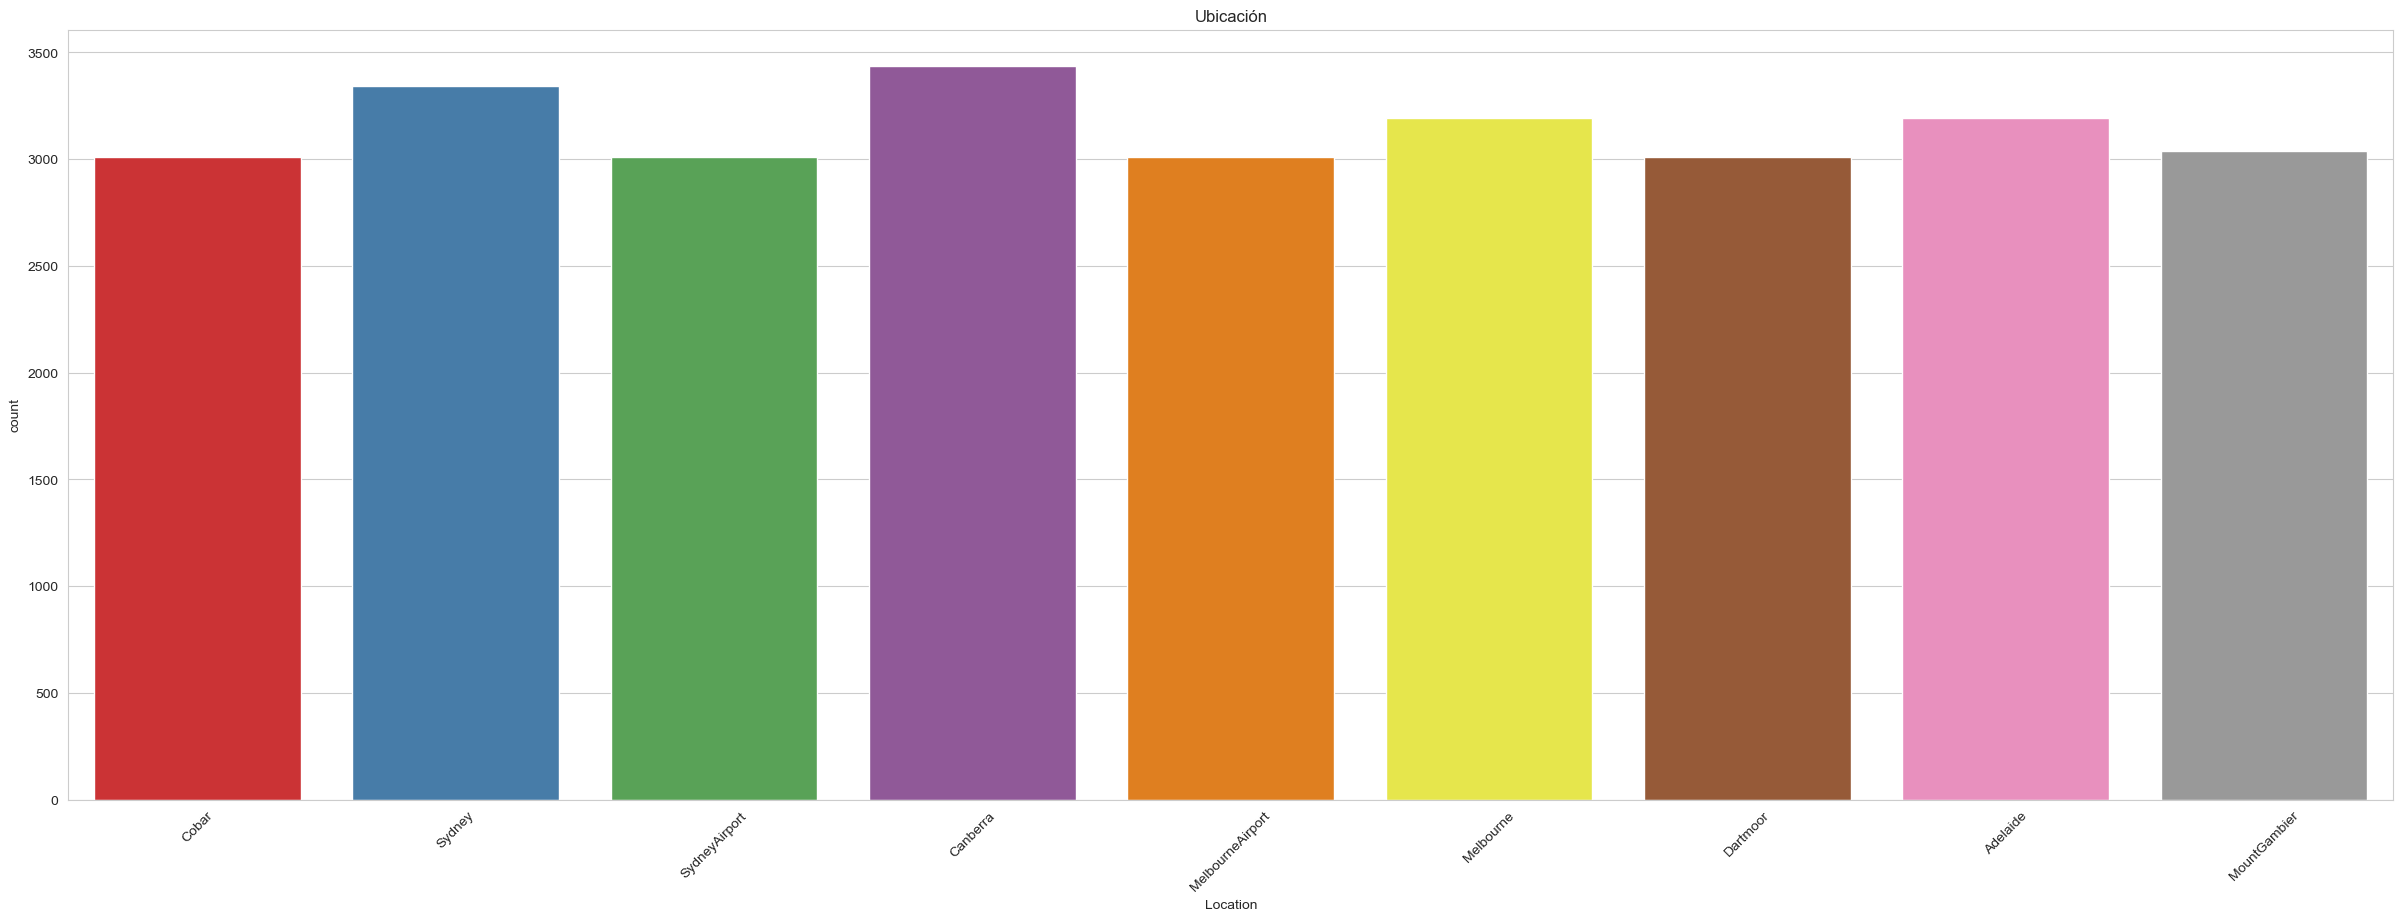

In [12]:
plt.figure(figsize=(30,10))

palette = "Set1"

ax = sns.countplot( x='Location', data=df, palette=palette, hue='Location', legend=False)
plt.title('Ubicación')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

Se puede observar que todas las ciudades en estudio, poseen una distribución casi uniforme de datos; esto ayuda a la confiabilidad de las predicciónes para cada ciudad.

### DATOS DE DIFERENTES TIEMPOS Y VALORES ATIPICOS

In [13]:
# Resumen estadistico
df.describe().round(2)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
count,27663.00,27675.00,27247.00,23880.00,21520.00,26591.00,27875.00,27893.00,27293.00,27343.00,27394.00,27404.00,18866.00,18683.00,27648.00,27657.00,27247.00,27248.00,27248.00
mean,11.26,21.90,2.05,4.83,6.89,41.84,15.13,20.02,68.77,50.50,1018.25,1016.15,4.67,4.73,15.48,20.41,0.24,0.24,2.05
std,5.71,6.69,6.38,3.71,3.87,14.19,9.46,8.98,18.73,19.94,7.42,7.27,2.81,2.63,5.70,6.53,0.43,0.43,6.38
min,-8.00,4.10,0.00,0.00,0.00,9.00,0.00,0.00,5.00,1.00,982.30,984.90,0.00,0.00,-1.30,3.70,0.00,0.00,0.00
25%,7.40,16.60,0.00,2.20,3.80,31.00,9.00,13.00,57.00,37.00,1013.30,1011.30,1.00,2.00,11.40,15.40,0.00,0.00,0.00
50%,10.90,21.00,0.00,4.00,7.40,39.00,13.00,19.00,70.00,50.00,1018.40,1016.30,6.00,6.00,15.00,19.50,0.00,0.00,0.00
75%,15.20,26.20,1.00,6.60,10.00,50.00,20.00,26.00,83.00,64.00,1023.30,1021.10,7.00,7.00,19.12,24.50,0.00,0.00,1.00
max,33.90,46.80,119.40,86.20,14.30,122.00,69.00,76.00,100.00,100.00,1040.60,1037.90,9.00,8.00,38.60,46.10,1.00,1.00,119.40


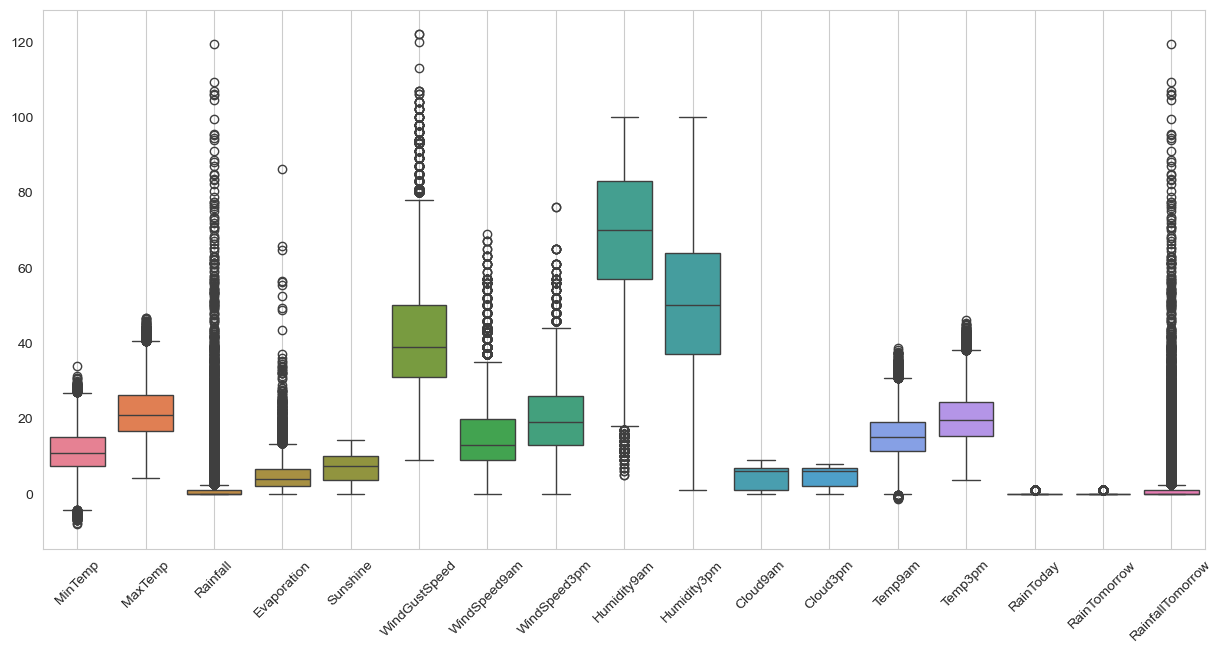

In [14]:
plt.figure(figsize=(15,7))

# Los valores de presión se graficaran a parte ya que numericamente son grandes y deforma los box de las demas columnas 
ax = sns.boxplot(data= df[df.describe().columns].drop(columns=['Pressure9am', 'Pressure3pm']))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.grid()
plt.show()

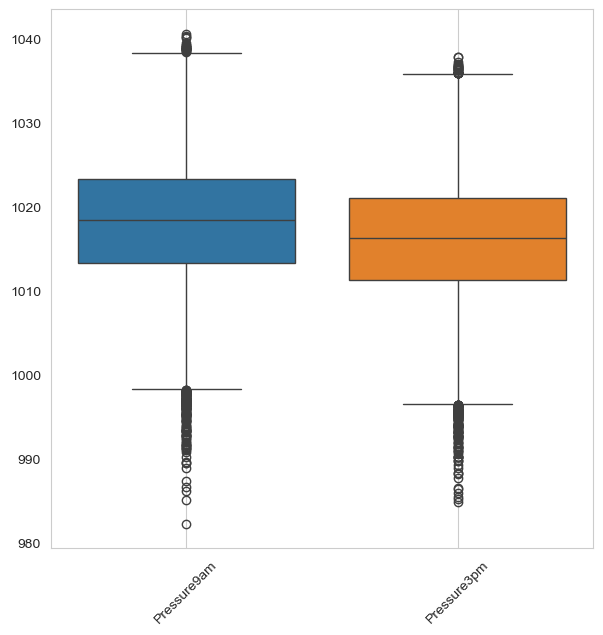

In [15]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(data=df[['Pressure9am', 'Pressure3pm']])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.grid()
plt.show()

Observamos la matriz de correlación

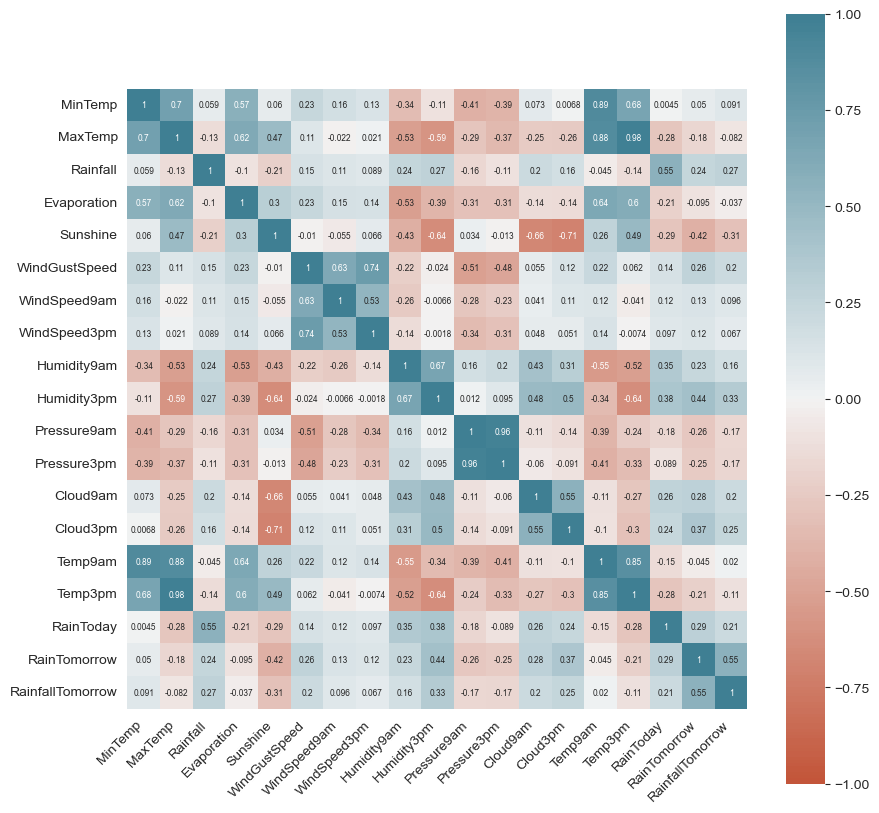

In [16]:
corr = df[df.describe().columns].corr()
plt.figure(figsize=(10,10))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Observando los graficos anteriores y prestando atención particular con las columnas que presentan datos del mismo tipo pero con diferente horario, se observo y  se tomo la decisión de unificarlas, explicación:

* En el diagrama de box se observa un comportamiento similar entre los pares.
* En la matriz de correlación se observa valores aproximados entre los pares con respecto a la variable objetivo, excepto el par de temperatura, por ello se prestara atención al coeficiente de correlación resultante de la unificación.
* La proporción de datos faltantes entre los pares es similar, excepto el par de velocidad del viento pero el mayor es del 6% por lo que la imputación  de datos lo cubrira con un 94% de información disponible.

Las operaciones típicas seran:
* col9am - col3pm; Diferencia (o Variación) entre dos eventos distintos
* (col9am + col3pm)/2; Promedio de valores entre dos eventos distintos
(Dado que el evento de las 3pm podria no estar disponible, se podria plantear una verificación del comportamiento del modelo teniendo solo el datos de las 9am)

La operación adecuada para cada par de columnas, sera aquella que mantenga el nivel más alto de correlacion en comparación a la versión separada de cada par.
En caso de no llegar a un valor considerable de correlación comparativa con la version individual, se cancelara la unificación.

Unificación de las columnas de diferente horario, se itero para determinar que operación era la mas adecuada.

In [17]:
df['windelta'] = (df.WindSpeed9am + df.WindSpeed3pm)/2

df['humdelta'] = (df.Humidity9am + df.Humidity3pm)/2

df['clodelta'] = (df.Cloud9am + df.Cloud3pm)/2

df['presdelta'] = df.Pressure9am - df.Pressure3pm

df['temdelta'] = df.Temp9am - df.Temp3pm

In [18]:
# Dropeamos los pares de columnas de diferente horario

columns_to_drop = ["WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]

df.drop(columns=columns_to_drop, inplace=True)


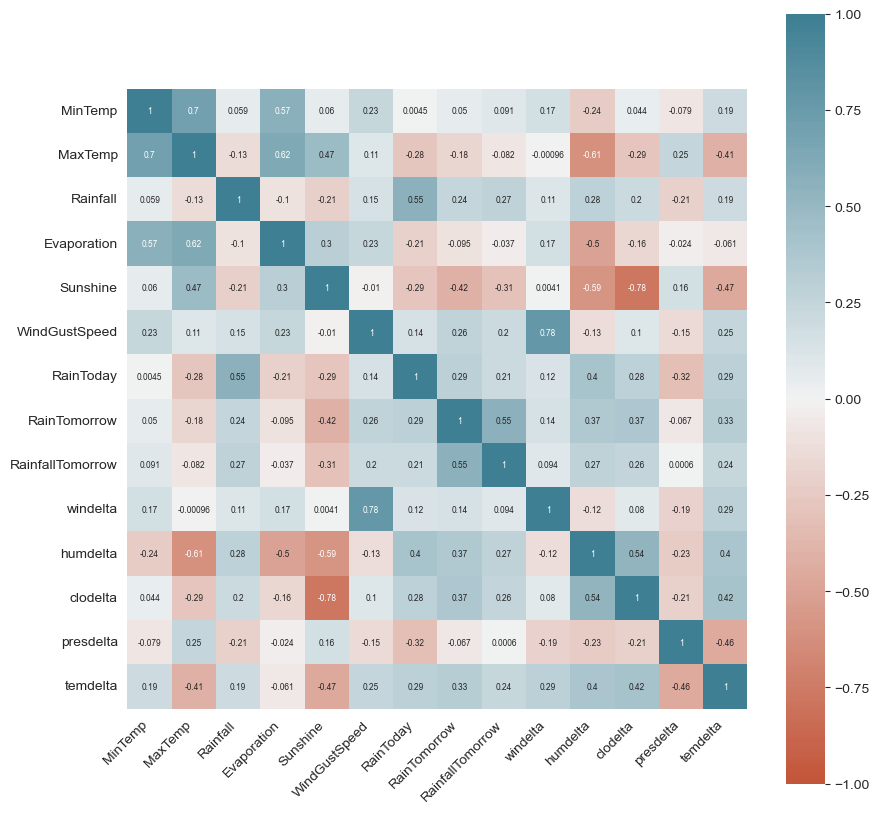

In [19]:
corr = df[df.describe().columns].corr()
plt.figure(figsize=(10,10))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Se unificaron todos los pares al verificar que cada uno alcanza como mínimo una correlación similar al de la forma individual en base a la variable objetivo. 

Con las columnas finales volvemos a observar algunas distribuciones

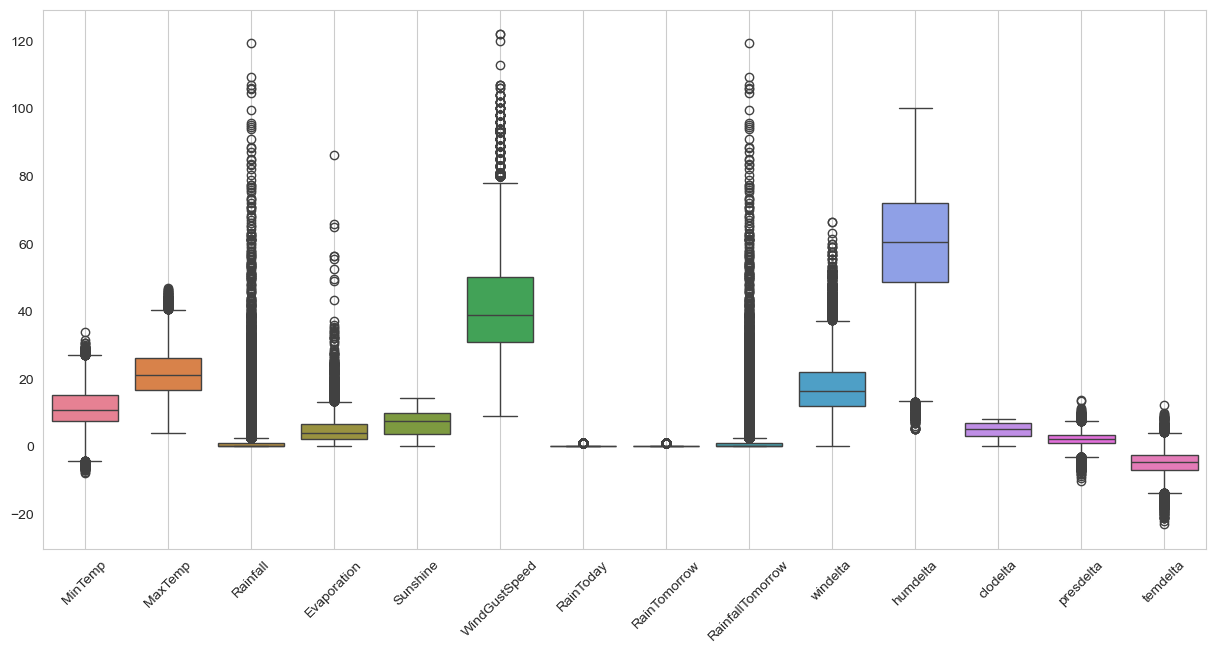

In [20]:
plt.figure(figsize=(15,7))

ax = sns.boxplot(data= df[df.describe().columns])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.grid()
plt.show()

In [21]:
#_ = sns.pairplot(df[df.describe().columns], diag_kind="kde")

ANALISIS DE VALORES ATIPICOS:

Las 4 columnas Rainfall - Evaporation - WindGustSpeed - windelta presentan una distribución particular de outliers:

* WindGustSpeed: Los valores de velocidad de rafaga de viento para el outlier mas alto se encuentra dentro del rango de valores medidos en Australia, por lo que no se eliminaran

* windelta: Similar al caso anterior se encuentran dentro de un rango de valores medidos.

* Evaporation: Valores mayores a 60 son altos, pero según registros el record registrado es de 110mm, por lo que el outlier de 80mm aprox estaria dentro de un valor posible.

* Rainfall - RainfallTomorrow: Similar al caso anterior los valores de lluvia que se observan son valores posibles de registrar, por lo que no se eliminaran

El dataset a pesar de tener valores faltantes, no se encuentran outliers que demuestren ser errores gruesos

### IMPUTACION DE DATOS

In [22]:
# Proporción de datos faltantes

(df.isna().sum()/df.shape[0]).round(2)*100

Location             0.0
MinTemp              2.0
MaxTemp              2.0
Rainfall             3.0
Evaporation         15.0
Sunshine            24.0
WindGustDir          6.0
WindGustSpeed        6.0
WindDir9am           6.0
WindDir3pm           2.0
RainToday            3.0
RainTomorrow         3.0
RainfallTomorrow     3.0
month                0.0
windelta             1.0
humdelta             3.0
clodelta            36.0
presdelta            3.0
temdelta             2.0
dtype: float64

Tecnica adoptada en cada caso:

Rainfall - RainfallTomorrow: Se imputara según datos agrupados primero por mes y segundo por ciudad, segun la mediana de los datos resultantes del grupo, la cual se ajustara con la proporción de dias lluviosos del mes correspondiente.

MinTemp - MaxTemp - Evaporation - Sunshine - WindGustSpeed - RainToday - windelta - humdelta - clodelta - presdelta - temdelta: Se imputara según datos agrupados primero por mes, segundo por ciudad y tercero por rango de lluvia asociado(ya que se considera que la presencia y magnitud de lluvia interactua con todos los valores climaticos), segun la mediana de los datos resultantes del grupo (la mediana para evitar la influencia de valores de eventos extraordinarios)

In [23]:
# Calcular la proporción de días lluviosos por mes
rain_prop = df.groupby('month')['RainToday'].mean()

# Agrupar por mes y ubicación, y calcular la mediana de Rainfall
median_rainfall = df.groupby(['month', 'Location'])['Rainfall'].median()

# Ajustar la mediana de Rainfall según la proporción de días lluviosos por mes
median_rainfall_adjusted = (median_rainfall * rain_prop[median_rainfall.index.get_level_values('month')].values).round(1)

# Rellenar los valores faltantes en Rainfall con la mediana ajustada correspondiente
df['Rainfall'] = df.apply(lambda row: median_rainfall_adjusted[row['month'], row['Location']].round(1) if pd.isnull(row['Rainfall']) else row['Rainfall'], axis=1)


In [24]:
df.Rainfall.isna().sum()

0

In [25]:
# Calcular la proporción de días lluviosos por mes
rain_prop = df.groupby('month')['RainfallTomorrow'].mean()

# Agrupar por mes y ubicación, y calcular la mediana de RainfallTomorrow
median_rainfall = df.groupby(['month', 'Location'])['RainfallTomorrow'].median()

# Ajustar la mediana de RainfallTomorrow según la proporción de días lluviosos por mes
median_rainfall_adjusted = (median_rainfall * rain_prop[median_rainfall.index.get_level_values('month')].values).round(1)

# Rellenar los valores faltantes en RainfallTomorrow con la mediana ajustada correspondiente
df['RainfallTomorrow'] = df.apply(lambda row: median_rainfall_adjusted[row['month'], row['Location']].round(1) if pd.isnull(row['RainfallTomorrow']) else row['RainfallTomorrow'], 
                                  axis=1)

In [26]:
df.RainfallTomorrow.isna().sum()

0

In [27]:
# Definición del tamaño de cada rango; esto es el tamaño del rango en que los demas valores climaticos suelen compartir magnitudes típicas
# La interacción es mucho mas compleja por lo que esta es una simplificación a efectos prácticos
range_size = 4

num_ranges = int(df['Rainfall'].max()/range_size) + 1 # Dado que el truncamiento podria dejar valores afuera se agrega un rango más

min_rainfall = df['Rainfall'].min()

# Crear una lista de tuplas con los rangos
rainfall_ranges = [(round(min_rainfall + i * range_size), round(min_rainfall + (i + 1) * range_size)) for i in range(num_ranges)]

# Función para asignar un rango de lluvia a cada valor de Rainfall
def assign_range(rainfall):
    for i, (lower, upper) in enumerate(rainfall_ranges):
        if lower <= rainfall < upper:
            return f'{lower}-{upper}'
    return f'{rainfall_ranges[-1][0]}+'

In [28]:
# Crear una nueva columna 'RainfallRange' que contenga los rangos de lluvia asignados
df['RainfallRange'] = df['Rainfall'].apply(assign_range)

# Agrupar por mes, ubicación y rango de lluvia, y calcular la mediana de MinTemp
median = df.groupby(['month', 'Location', 'RainfallRange'])[df.describe().columns].median()


In [29]:
# Verificar si hay valores NaN en el DataFrame resultante
if median.isna().any().any():
    print("El DataFrame agrupado contiene valores NaN.")
else:
    print("El DataFrame agrupado no contiene valores NaN.")

El DataFrame agrupado contiene valores NaN.


Dado que podia pasar esto, los valores faltantes se completaran con el siguiente nivel del groupby

In [30]:
# Calcular la mediana del grupo 'Location' dentro de cada 'month'
median_location_month = df.groupby(['month', 'Location'])[df.describe().columns].median()

# Rellenar los valores NaN en el DataFrame agrupado 'median' con la mediana del grupo 'Location' para cada combinación de 'month' y 'Location'
median = median.fillna(median_location_month)


In [31]:
# Calcular la mediana del grupo 'month'
median_month = df.groupby('month')[df.describe().columns].median()

# Rellenar los valores NaN en el DataFrame agrupado 'median_filled' con la mediana del grupo 'month' para cada 'month' que aún tenga valores NaN
median = median.fillna(median_month)


In [32]:
# Verificar si hay valores NaN en el DataFrame resultante
if median.isna().any().any():
    print("El DataFrame agrupado contiene valores NaN.")
else:
    print("El DataFrame agrupado no contiene valores NaN.")

El DataFrame agrupado no contiene valores NaN.


In [33]:
# Columnas a imputar datos
cols = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'windelta', 'humdelta', 'clodelta', 'presdelta', 'temdelta']

for i in cols:
    df[i] = df.apply(lambda row: median.loc[row['month'], row['Location'], row['RainfallRange']][i] if pd.isna(row[i]) else row[i], axis=1)

In [34]:
# Eliminar la columna auxiliar RainfallRange
df.drop(columns=['RainfallRange'], inplace=True)

In [35]:
(df.isna().sum()/df.shape[0])*100

Location            0.000000
MinTemp             0.000000
MaxTemp             0.000000
Rainfall            0.000000
Evaporation         0.000000
Sunshine            0.000000
WindGustDir         5.826515
WindGustSpeed       0.000000
WindDir9am          5.837141
WindDir3pm          1.547834
RainToday           3.492367
RainTomorrow        3.488825
RainfallTomorrow    0.000000
month               0.000000
windelta            0.000000
humdelta            0.000000
clodelta            0.000000
presdelta           0.000000
temdelta            0.000000
dtype: float64

Completado los datos del tipo numerico queda por resolver los del tipo string y las booleanas

In [36]:
# Agrupar por mes y ubicación, y calcular la moda de las columnas string y las booleanas
mode_str = df.groupby(['month', 'Location'])[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']].agg(lambda x: x.mode()[0])


In [37]:
# Columnas a imputar datos
cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for i in cols:
    df[i] = df.apply(lambda row: mode_str.loc[row['month'], row['Location']][i] if pd.isna(row[i]) else row[i], axis=1)

In [38]:
(df.isna().sum()/df.shape[0])*100

Location            0.0
MinTemp             0.0
MaxTemp             0.0
Rainfall            0.0
Evaporation         0.0
Sunshine            0.0
WindGustDir         0.0
WindGustSpeed       0.0
WindDir9am          0.0
WindDir3pm          0.0
RainToday           0.0
RainTomorrow        0.0
RainfallTomorrow    0.0
month               0.0
windelta            0.0
humdelta            0.0
clodelta            0.0
presdelta           0.0
temdelta            0.0
dtype: float64

In [39]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,RainfallTomorrow,month,windelta,humdelta,clodelta,presdelta,temdelta
6047,Cobar,17.9,35.2,0.0,12.0,12.30,SSW,48.0,ENE,SW,0.0,0.0,0.0,01,13.0,16.5,3.5,1.9,-6.80
6048,Cobar,18.4,28.9,0.0,14.8,13.00,S,37.0,SSE,SSE,0.0,0.0,0.0,01,19.0,19.0,1.0,0.8,-6.70
6049,Cobar,15.5,34.1,0.0,12.6,13.30,SE,30.0,ENE,N,0.0,0.0,0.0,01,16.5,27.5,2.5,2.7,-7.35
6050,Cobar,19.4,37.6,0.0,10.8,10.60,NNE,46.0,NNE,NNW,0.0,0.0,0.0,01,22.5,32.0,3.5,3.1,-6.20
6051,Cobar,21.9,38.4,0.0,11.4,12.20,WNW,31.0,WNW,WSW,0.0,0.0,0.0,01,6.0,29.5,3.0,3.6,-6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,MountGambier,6.2,16.3,0.0,1.0,4.05,N,41.0,N,NW,0.0,1.0,2.0,06,23.0,79.5,6.5,2.2,-6.80
102516,MountGambier,8.7,13.2,2.0,1.0,4.05,S,20.0,N,SE,1.0,0.0,0.0,06,5.5,90.0,6.5,0.9,-0.90
102517,MountGambier,7.0,15.7,0.0,1.0,4.05,N,31.0,N,NNW,0.0,0.0,0.0,06,14.0,79.5,6.5,4.6,-4.90
102518,MountGambier,5.4,16.2,0.0,1.0,4.05,N,37.0,NNW,W,0.0,1.0,2.2,06,24.0,80.0,6.0,2.6,-8.50


### BALANCEO DEL DATASET

Se observara la información con respecto a la cantidad de dias con y sin precipitaciones 

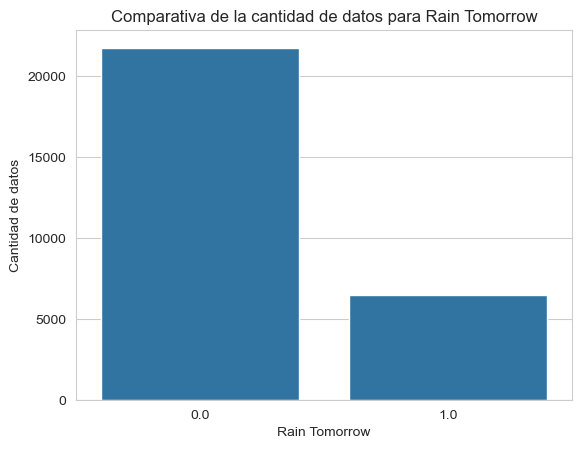

In [40]:
# Contar la cantidad de datos para cada valor en la columna "RainTomorrow"
conteo = df['RainTomorrow'].value_counts()

# Crear el gráfico de barras usando Seaborn
sns.barplot(x=conteo.index, y=conteo.values)

# Agregar etiquetas y título al gráfico
plt.xlabel('Rain Tomorrow')
plt.ylabel('Cantidad de datos')
plt.title('Comparativa de la cantidad de datos para Rain Tomorrow')

# Mostrar el gráfico
plt.show()

El conjunto de datos muestra un desbalanceo, ya que la mayoría de los registros corresponden a días con condiciones climáticas sin precipitaciones.
En cierto modo se podria decir que el dataset podria predecir cuando no va a llover con mejor probabilidad que cuando va a llover. 

### ESTANDARIZACION

Se realiza para poder ver la influencia de los distintos coeficientes, ya que las variables con mayores valores pueden resultar con coeficientes de valores extremos, por lo tanto en la interpretación del modelo resultante puede darse un sesgo en la importancia de los coeficientes en la predicción.

In [41]:
# Filtramos para quedarnos con las columnas numericas

dfe = df.copy()
dfn = dfe[dfe.drop(['RainToday', 'RainTomorrow', 'RainfallTomorrow'], axis=1).describe().columns].copy()

# Usamos la media y el desvio estandar

dfe[dfn.columns] = (dfn - dfn.mean())/dfn.std()

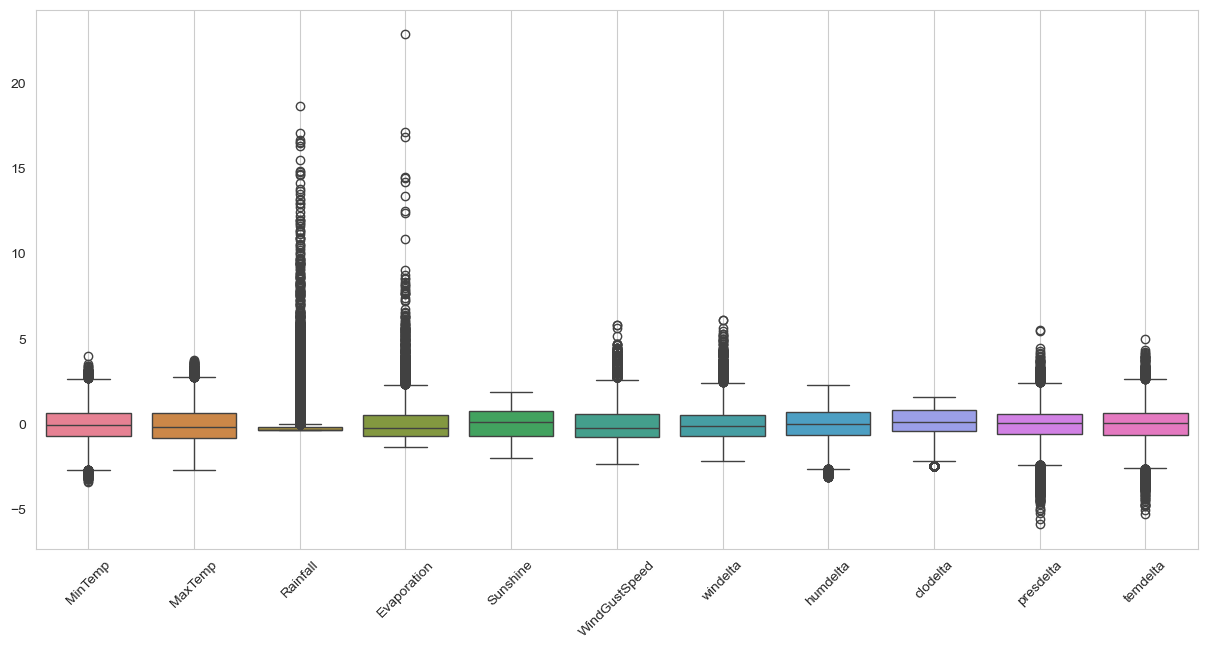

In [42]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=dfe[dfn.describe().columns])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.grid()
plt.show()

In [43]:
dfe

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,RainfallTomorrow,month,windelta,humdelta,clodelta,presdelta,temdelta
6047,Cobar,1.166070,1.998131,-0.314982,2.038138,1.343511,SSW,0.453531,ENE,SW,0.0,0.0,0.0,01,-0.566809,-2.449883,-0.655584,-0.100540,-0.545775
6048,Cobar,1.254261,1.051116,-0.314982,2.825008,1.533296,S,-0.341789,SSE,SSE,0.0,0.0,0.0,01,0.181595,-2.307890,-1.920246,-0.631345,-0.516545
6049,Cobar,0.742757,1.832779,-0.314982,2.206753,1.614633,SE,-0.847901,ENE,N,0.0,0.0,0.0,01,-0.130240,-1.825113,-1.161448,0.285499,-0.706540
6050,Cobar,1.430641,2.358899,-0.314982,1.700907,0.882605,NNE,0.308927,NNE,NNW,0.0,0.0,0.0,01,0.618164,-1.569525,-0.655584,0.478519,-0.370395
6051,Cobar,1.871593,2.479155,-0.314982,1.869522,1.316399,WNW,-0.775599,WNW,WSW,0.0,0.0,0.0,01,-1.439947,-1.711519,-0.908516,0.719794,-0.458085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,MountGambier,-0.897582,-0.842914,-0.314982,-1.053141,-0.893241,N,-0.052582,N,NW,0.0,1.0,2.0,06,0.680531,1.128345,0.862011,0.044225,-0.545775
102516,MountGambier,-0.456631,-1.308906,0.003324,-1.053141,-0.893241,S,-1.570919,N,SE,1.0,0.0,0.0,06,-1.502314,1.724716,0.862011,-0.583090,1.178794
102517,MountGambier,-0.756477,-0.933106,-0.314982,-1.053141,-0.893241,N,-0.775599,N,NNW,0.0,0.0,0.0,06,-0.442075,1.128345,0.862011,1.202343,0.009595
102518,MountGambier,-1.038686,-0.857946,-0.314982,-1.053141,-0.893241,N,-0.341789,NNW,W,0.0,1.0,2.2,06,0.805265,1.156744,0.609079,0.237244,-1.042685


In [44]:
categorias = ['Location', 'month', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

def add_prefix(column_name, prefix):
    return prefix + '_' + column_name

# Convertir las columnas especificadas en variables dummy
dfm = pd.get_dummies(dfe, columns = categorias, prefix = ["dy_"+ i for i in categorias], dtype = int)

# Mostrar las primeras filas del DataFrame resultante
dfm

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainTomorrow,RainfallTomorrow,windelta,humdelta,clodelta,presdelta,temdelta,dy_Location_Adelaide,dy_Location_Canberra,dy_Location_Cobar,dy_Location_Dartmoor,dy_Location_Melbourne,dy_Location_MelbourneAirport,dy_Location_MountGambier,dy_Location_Sydney,dy_Location_SydneyAirport,dy_month_01,dy_month_02,dy_month_03,dy_month_04,dy_month_05,dy_month_06,dy_month_07,dy_month_08,dy_month_09,dy_month_10,dy_month_11,dy_month_12,dy_WindGustDir_E,dy_WindGustDir_ENE,dy_WindGustDir_ESE,dy_WindGustDir_N,dy_WindGustDir_NE,dy_WindGustDir_NNE,dy_WindGustDir_NNW,dy_WindGustDir_NW,dy_WindGustDir_S,dy_WindGustDir_SE,dy_WindGustDir_SSE,dy_WindGustDir_SSW,dy_WindGustDir_SW,dy_WindGustDir_W,dy_WindGustDir_WNW,dy_WindGustDir_WSW,dy_WindDir9am_E,dy_WindDir9am_ENE,dy_WindDir9am_ESE,dy_WindDir9am_N,dy_WindDir9am_NE,dy_WindDir9am_NNE,dy_WindDir9am_NNW,dy_WindDir9am_NW,dy_WindDir9am_S,dy_WindDir9am_SE,dy_WindDir9am_SSE,dy_WindDir9am_SSW,dy_WindDir9am_SW,dy_WindDir9am_W,dy_WindDir9am_WNW,dy_WindDir9am_WSW,dy_WindDir3pm_E,dy_WindDir3pm_ENE,dy_WindDir3pm_ESE,dy_WindDir3pm_N,dy_WindDir3pm_NE,dy_WindDir3pm_NNE,dy_WindDir3pm_NNW,dy_WindDir3pm_NW,dy_WindDir3pm_S,dy_WindDir3pm_SE,dy_WindDir3pm_SSE,dy_WindDir3pm_SSW,dy_WindDir3pm_SW,dy_WindDir3pm_W,dy_WindDir3pm_WNW,dy_WindDir3pm_WSW
6047,1.166070,1.998131,-0.314982,2.038138,1.343511,0.453531,0.0,0.0,0.0,-0.566809,-2.449883,-0.655584,-0.100540,-0.545775,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6048,1.254261,1.051116,-0.314982,2.825008,1.533296,-0.341789,0.0,0.0,0.0,0.181595,-2.307890,-1.920246,-0.631345,-0.516545,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6049,0.742757,1.832779,-0.314982,2.206753,1.614633,-0.847901,0.0,0.0,0.0,-0.130240,-1.825113,-1.161448,0.285499,-0.706540,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6050,1.430641,2.358899,-0.314982,1.700907,0.882605,0.308927,0.0,0.0,0.0,0.618164,-1.569525,-0.655584,0.478519,-0.370395,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6051,1.871593,2.479155,-0.314982,1.869522,1.316399,-0.775599,0.0,0.0,0.0,-1.439947,-1.711519,-0.908516,0.719794,-0.458085,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,-0.897582,-0.842914,-0.314982,-1.053141,-0.893241,-0.052582,0.0,1.0,2.0,0.680531,1.128345,0.862011,0.044225,-0.545775,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
102516,-0.456631,-1.308906,0.003324,-1.053141,-0.893241,-1.570919,1.0,0.0,0.0,-1.502314,1.724716,0.862011,-0.583090,1.178794,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
102517,-0.756477,-0.933106,-0.314982,-1.053141,-0.893241,-0.775599,0.0,0.0,0.0,-0.442075,1.128345,0.862011,1.202343,0.009595,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
102518,-1.038686,-0.857946,-0.314982,-1.053141,-0.893241,-0.341789,0.0,1.0,2.2,0.805265,1.156744,0.609079,0.237244,-1.042685,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [45]:
cols_corr = dfm.drop(dfm.columns[(dfm.nunique() == 2) | dfm.columns.str.startswith('dy_')], axis=1).columns

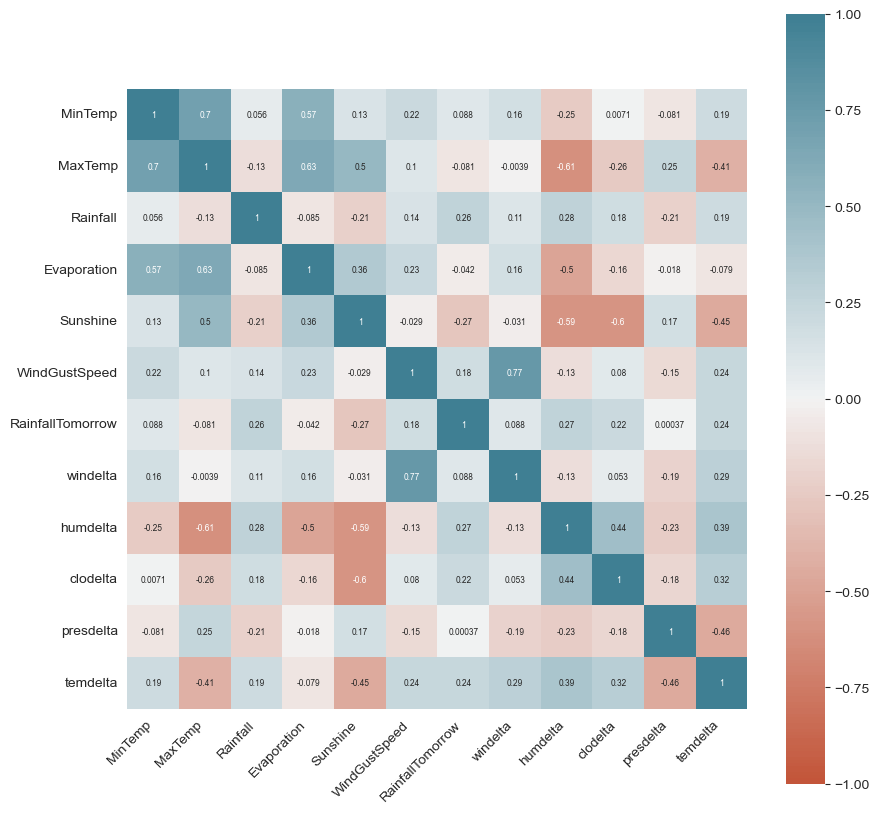

In [46]:
corr = dfm[cols_corr].corr()
plt.figure(figsize=(10, 10))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

## MODELADO: REGRESION LINEAL - REGULARIZACION - METRICAS

### TRAIN - TEST

Procedemos a dividir los datos en TRAIN-TEST; a ambos conjuntos se le aplicara la verificación de metricas para verificar que en el test haya buena generalización y en el train para ver el comportamiento del modelo

In [47]:
x_train, x_test, y_train, y_test = train_test_split(dfm.drop(columns = ['RainfallTomorrow','RainTomorrow'], axis=1), dfm['RainfallTomorrow'], test_size=0.2, random_state=33)

In [48]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22586, 81), (5647, 81), (22586,), (5647,))

In [49]:
x_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,windelta,humdelta,clodelta,presdelta,temdelta,dy_Location_Adelaide,dy_Location_Canberra,dy_Location_Cobar,dy_Location_Dartmoor,dy_Location_Melbourne,dy_Location_MelbourneAirport,dy_Location_MountGambier,dy_Location_Sydney,dy_Location_SydneyAirport,dy_month_01,dy_month_02,dy_month_03,dy_month_04,dy_month_05,dy_month_06,dy_month_07,dy_month_08,dy_month_09,dy_month_10,dy_month_11,dy_month_12,dy_WindGustDir_E,dy_WindGustDir_ENE,dy_WindGustDir_ESE,dy_WindGustDir_N,dy_WindGustDir_NE,dy_WindGustDir_NNE,dy_WindGustDir_NNW,dy_WindGustDir_NW,dy_WindGustDir_S,dy_WindGustDir_SE,dy_WindGustDir_SSE,dy_WindGustDir_SSW,dy_WindGustDir_SW,dy_WindGustDir_W,dy_WindGustDir_WNW,dy_WindGustDir_WSW,dy_WindDir9am_E,dy_WindDir9am_ENE,dy_WindDir9am_ESE,dy_WindDir9am_N,dy_WindDir9am_NE,dy_WindDir9am_NNE,dy_WindDir9am_NNW,dy_WindDir9am_NW,dy_WindDir9am_S,dy_WindDir9am_SE,dy_WindDir9am_SSE,dy_WindDir9am_SSW,dy_WindDir9am_SW,dy_WindDir9am_W,dy_WindDir9am_WNW,dy_WindDir9am_WSW,dy_WindDir3pm_E,dy_WindDir3pm_ENE,dy_WindDir3pm_ESE,dy_WindDir3pm_N,dy_WindDir3pm_NE,dy_WindDir3pm_NNE,dy_WindDir3pm_NNW,dy_WindDir3pm_NW,dy_WindDir3pm_S,dy_WindDir3pm_SE,dy_WindDir3pm_SSE,dy_WindDir3pm_SSW,dy_WindDir3pm_SW,dy_WindDir3pm_W,dy_WindDir3pm_WNW,dy_WindDir3pm_WSW
65450,-1.708932,-1.474258,-0.314982,-0.996936,-1.313480,0.887342,0.0,0.867632,0.617170,1.114944,0.816304,0.184975,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
30342,-0.262612,-1.384066,1.085565,-0.659705,-1.964172,-1.137108,1.0,-0.192607,1.554325,1.367876,0.188989,0.828034,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
33228,0.389996,0.089069,-0.314982,0.576806,0.313249,0.092022,0.0,0.742898,-1.001553,-0.149719,-0.534835,0.038825,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9025,-0.738839,-0.361891,-0.314982,-0.378680,0.719932,-0.992505,0.0,-0.566809,-0.035999,-0.908516,0.912814,-0.575005,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
101634,0.725119,0.479901,-0.314982,-0.210065,0.231913,-0.197185,0.0,0.243962,0.361582,-0.149719,-1.065639,-0.721155,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101569,-0.086231,-0.437050,0.066985,-0.041450,0.503035,0.092022,1.0,0.680531,-0.660769,0.862011,-1.162149,0.301895,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6625,-1.320895,-1.489290,-0.314982,-0.659705,0.665707,0.308927,0.0,1.179467,0.418379,-0.655584,0.333754,0.331125,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
33007,1.360089,0.915828,-0.314982,-0.041450,1.424848,-1.281712,0.0,-0.442075,0.077596,-1.667313,-0.438325,0.272665,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8486,1.113156,1.712524,-0.314982,2.487778,1.370623,-0.197185,0.0,0.119228,-1.626323,-0.908516,1.009323,-1.568824,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### REGRESION LINEAL

In [50]:
# Crear y ajustar el modelo de regresión lineal
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [51]:
y_pred = reg.predict(x_test)

In [52]:
reg.coef_, reg.intercept_

(array([-5.72834465e-01,  1.15499602e+00,  9.27652345e-01,  1.64433931e-01,
        -8.98603810e-01,  1.45198383e+00,  7.68461324e-02, -3.42562491e-01,
         1.75586615e+00,  1.05946320e-01,  1.02686954e+00,  1.13035872e+00,
        -8.20832811e+11, -8.20832811e+11, -8.20832811e+11, -8.20832811e+11,
        -8.20832811e+11, -8.20832811e+11, -8.20832811e+11, -8.20832811e+11,
        -8.20832811e+11, -2.71452688e+11, -2.71452688e+11, -2.71452688e+11,
        -2.71452688e+11, -2.71452688e+11, -2.71452688e+11, -2.71452688e+11,
        -2.71452688e+11, -2.71452688e+11, -2.71452688e+11, -2.71452688e+11,
        -2.71452688e+11, -5.75539582e+11, -5.75539582e+11, -5.75539582e+11,
        -5.75539582e+11, -5.75539582e+11, -5.75539582e+11, -5.75539582e+11,
        -5.75539582e+11, -5.75539582e+11, -5.75539582e+11, -5.75539582e+11,
        -5.75539582e+11, -5.75539582e+11, -5.75539582e+11, -5.75539582e+11,
        -5.75539582e+11,  1.24670303e+12,  1.24670303e+12,  1.24670303e+12,
         1.2

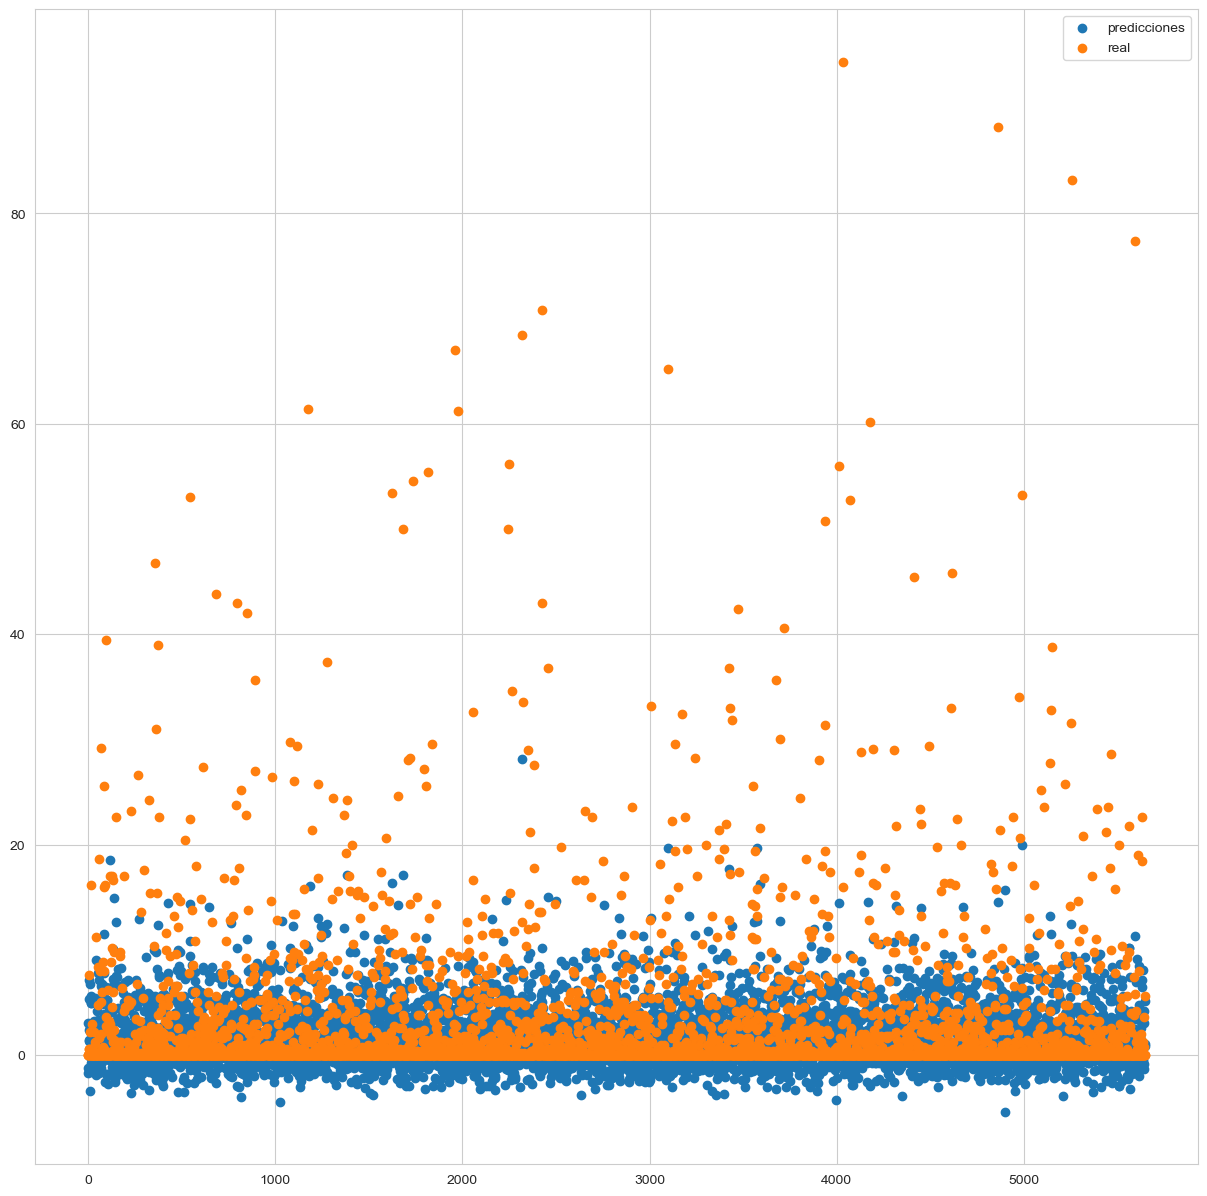

In [53]:
plt.figure(figsize=(15, 15))
x=range(len(y_test))
plt.scatter(x, y=y_pred, label='predicciones')
plt.scatter(x, y=y_test, label='real')
plt.legend()
plt.show()

In [54]:
# Calcular métricas de evaluación

mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse.round(4))

mae=mean_absolute_error(y_test, y_pred)
print("MAE:",mae.round(4))

reg.score(x_train,y_train), reg.score(x_test,y_test)
print(f"El R² para los datos de entrenamiento es: {reg.score(x_train,y_train).round(4)} y para los de testeo: {reg.score(x_test,y_test)}")

mape = (mae / (y_test)).mean() * 100
print("MAPE:",mape.round(4))


Error cuadrático medio: 29.5883
MAE: 2.6902
El R² para los datos de entrenamiento es: 0.2146 y para los de testeo: 0.22471931960449076
MAPE: inf


### METODOS DE REGULARIZACION

In [55]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

**RIDGE**

In [56]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [57]:
y_pred_re = ridge.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_re)
mse = mean_squared_error(y_test, y_pred_re)
rmse = np.sqrt(mse)
mape = (mae / y_test).mean() * 100

print("MAE:", mae.round(4))
print("MSE:", mse.round(4))
print("RMSE:",rmse.round(4))
print("MAPE:",mape.round(4))

print("El R² para los datos de entrenamiento es:", ridge.score(x_train, y_train).round(4), "El R² para los datos de test es:", ridge.score(x_test,y_test).round(4))

MAE: 2.6903
MSE: 29.5885
RMSE: 5.4395
MAPE: inf
El R² para los datos de entrenamiento es: 0.2146 El R² para los datos de test es: 0.2247


**LASSO**

In [58]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [59]:
y_pred_lo = lasso.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_lo)
mse = mean_squared_error(y_test, y_pred_lo)
rmse = np.sqrt(mse)
mape = (mae / y_test).mean() * 100

print("MAE:", mae.round(4))
print("MSE:", mse.round(4))
print("RMSE:",rmse.round(4))
print("MAPE:",mape.round(4))
print("El R² para los datos de entrenamiento es:", lasso.score(x_train, y_train).round(4), "El R² para los datos de test es:", lasso.score(x_test,y_test).round(4))

MAE: 2.5984
MSE: 30.3439
RMSE: 5.5085
MAPE: inf
El R² para los datos de entrenamiento es: 0.1929 El R² para los datos de test es: 0.2049


**ELASTICNET**

In [60]:
elasticnet.fit(x_train, y_train)

ElasticNet(alpha=0.1)

In [61]:
y_pred_et = elasticnet.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_et)
mse = mean_squared_error(y_test, y_pred_et)
rmse = np.sqrt(mse)
mape = (mae / y_test).mean() * 100

print("MAE:", mae.round(4))
print("MSE:", mse.round(4))
print("RMSE:",rmse.round(4))
print("MAPE:",mape.round(4))
print("El R² para los datos de entrenamiento es:", elasticnet.score(x_train, y_train).round(4), "El R² para los datos de test es:", elasticnet.score(x_test,y_test).round(4))

MAE: 2.5887
MSE: 30.207
RMSE: 5.4961
MAPE: inf
El R² para los datos de entrenamiento es: 0.1968 El R² para los datos de test es: 0.2085


### GRADIENTE DESCENDIENTE

In [62]:
def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]
    
    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))
    

    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W) 
        error_train = y_train - prediction_train  
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W) 
        error_test = y_test - prediction_test 
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de test')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W, X_train, X_test

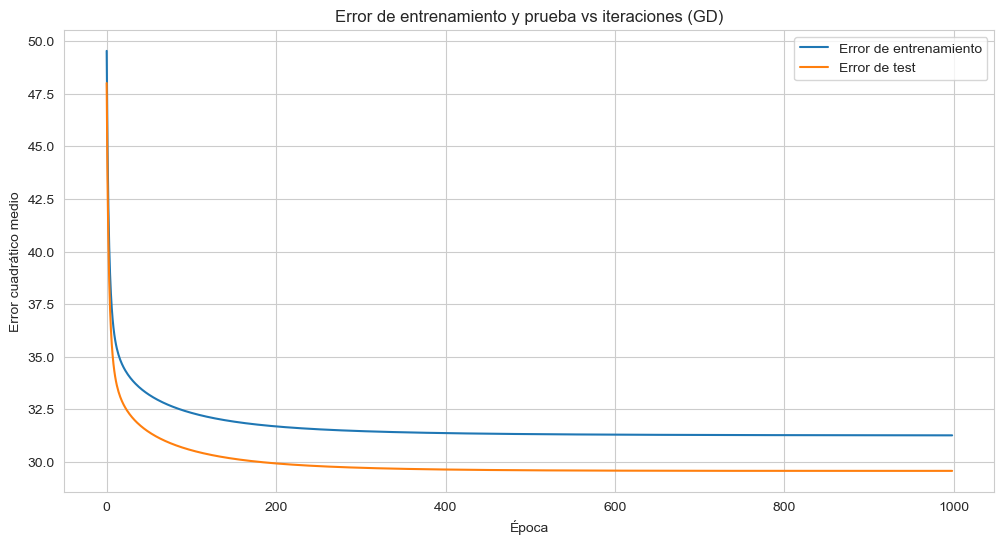

In [63]:
w, x_train, x_test = gradient_descent(x_train, y_train.values.reshape(-1,1), x_test, y_test.values.reshape(-1,1), lr=0.05, epochs=999)

In [64]:
# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred_dg = x_train.dot(w)
y_test_pred_dg = x_test.dot(w)

# Calcular R2 Score
r2_train = r2_score(y_train, y_train_pred_dg)
r2_test = r2_score(y_test, y_test_pred_dg)

# Calcular MSE
mse_train = mean_squared_error(y_train, y_train_pred_dg)
mse_test = mean_squared_error(y_test, y_test_pred_dg)

# Calcular RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calcular MAE
mae_train = mean_absolute_error(y_train, y_train_pred_dg)
mae_test = mean_absolute_error(y_test, y_test_pred_dg)

# Calcular MAPE
mape_train = np.mean(np.abs((y_train.values.reshape(-1,1) - y_train_pred_dg) / y_train.values.reshape(-1,1))) * 100
mape_test = np.mean(np.abs((y_test.values.reshape(-1,1) - y_test_pred_dg) / y_test.values.reshape(-1,1))) * 100

# Imprimir las métricas
print(f'R2 Score en entrenamiento: {r2_train.round(4)}, en prueba: {r2_test.round(4)}')
print(f'MSE en entrenamiento: {mse_train.round(4)}, en prueba: {mse_test.round(4)}')
print(f'RMSE en entrenamiento: {rmse_train.round(4)}, en prueba: {rmse_test.round(4)}')
print(f'MAE en entrenamiento: {mae_train.round(4)}, en prueba: {mae_test.round(4)}')
print(f'MAPE en entrenamiento: {mape_train.round(4)}%, en prueba: {mape_test.round(4)}%')

R2 Score en entrenamiento: 0.2144, en prueba: 0.2252
MSE en entrenamiento: 31.2599, en prueba: 29.5711
RMSE en entrenamiento: 5.5911, en prueba: 5.4379
MAE en entrenamiento: 2.6858, en prueba: 2.6878
MAPE en entrenamiento: inf%, en prueba: inf%


## OBSERVACIONES: REGRESION LINEAL - REGULARIZACION - METRICAS

No se observo un cambio notable en el R2 respecto al modelo de regresión lineal en la regularización.

Respecto al fitting obtenido, en ambos; podria considerarse que es bajo, pero respecto al fenomeno en estudio, el valor dentro de todo podria ser bueno.

## MODELADO: REGRESION LOGISTICA - METRICAS

In [65]:
dfm

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainTomorrow,RainfallTomorrow,windelta,humdelta,clodelta,presdelta,temdelta,dy_Location_Adelaide,dy_Location_Canberra,dy_Location_Cobar,dy_Location_Dartmoor,dy_Location_Melbourne,dy_Location_MelbourneAirport,dy_Location_MountGambier,dy_Location_Sydney,dy_Location_SydneyAirport,dy_month_01,dy_month_02,dy_month_03,dy_month_04,dy_month_05,dy_month_06,dy_month_07,dy_month_08,dy_month_09,dy_month_10,dy_month_11,dy_month_12,dy_WindGustDir_E,dy_WindGustDir_ENE,dy_WindGustDir_ESE,dy_WindGustDir_N,dy_WindGustDir_NE,dy_WindGustDir_NNE,dy_WindGustDir_NNW,dy_WindGustDir_NW,dy_WindGustDir_S,dy_WindGustDir_SE,dy_WindGustDir_SSE,dy_WindGustDir_SSW,dy_WindGustDir_SW,dy_WindGustDir_W,dy_WindGustDir_WNW,dy_WindGustDir_WSW,dy_WindDir9am_E,dy_WindDir9am_ENE,dy_WindDir9am_ESE,dy_WindDir9am_N,dy_WindDir9am_NE,dy_WindDir9am_NNE,dy_WindDir9am_NNW,dy_WindDir9am_NW,dy_WindDir9am_S,dy_WindDir9am_SE,dy_WindDir9am_SSE,dy_WindDir9am_SSW,dy_WindDir9am_SW,dy_WindDir9am_W,dy_WindDir9am_WNW,dy_WindDir9am_WSW,dy_WindDir3pm_E,dy_WindDir3pm_ENE,dy_WindDir3pm_ESE,dy_WindDir3pm_N,dy_WindDir3pm_NE,dy_WindDir3pm_NNE,dy_WindDir3pm_NNW,dy_WindDir3pm_NW,dy_WindDir3pm_S,dy_WindDir3pm_SE,dy_WindDir3pm_SSE,dy_WindDir3pm_SSW,dy_WindDir3pm_SW,dy_WindDir3pm_W,dy_WindDir3pm_WNW,dy_WindDir3pm_WSW
6047,1.166070,1.998131,-0.314982,2.038138,1.343511,0.453531,0.0,0.0,0.0,-0.566809,-2.449883,-0.655584,-0.100540,-0.545775,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6048,1.254261,1.051116,-0.314982,2.825008,1.533296,-0.341789,0.0,0.0,0.0,0.181595,-2.307890,-1.920246,-0.631345,-0.516545,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6049,0.742757,1.832779,-0.314982,2.206753,1.614633,-0.847901,0.0,0.0,0.0,-0.130240,-1.825113,-1.161448,0.285499,-0.706540,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6050,1.430641,2.358899,-0.314982,1.700907,0.882605,0.308927,0.0,0.0,0.0,0.618164,-1.569525,-0.655584,0.478519,-0.370395,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6051,1.871593,2.479155,-0.314982,1.869522,1.316399,-0.775599,0.0,0.0,0.0,-1.439947,-1.711519,-0.908516,0.719794,-0.458085,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,-0.897582,-0.842914,-0.314982,-1.053141,-0.893241,-0.052582,0.0,1.0,2.0,0.680531,1.128345,0.862011,0.044225,-0.545775,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
102516,-0.456631,-1.308906,0.003324,-1.053141,-0.893241,-1.570919,1.0,0.0,0.0,-1.502314,1.724716,0.862011,-0.583090,1.178794,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
102517,-0.756477,-0.933106,-0.314982,-1.053141,-0.893241,-0.775599,0.0,0.0,0.0,-0.442075,1.128345,0.862011,1.202343,0.009595,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
102518,-1.038686,-0.857946,-0.314982,-1.053141,-0.893241,-0.341789,0.0,1.0,2.2,0.805265,1.156744,0.609079,0.237244,-1.042685,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [66]:
cols_corrlog = dfm.drop(dfm.columns[dfm.columns.str.startswith('dy_')], axis=1).columns

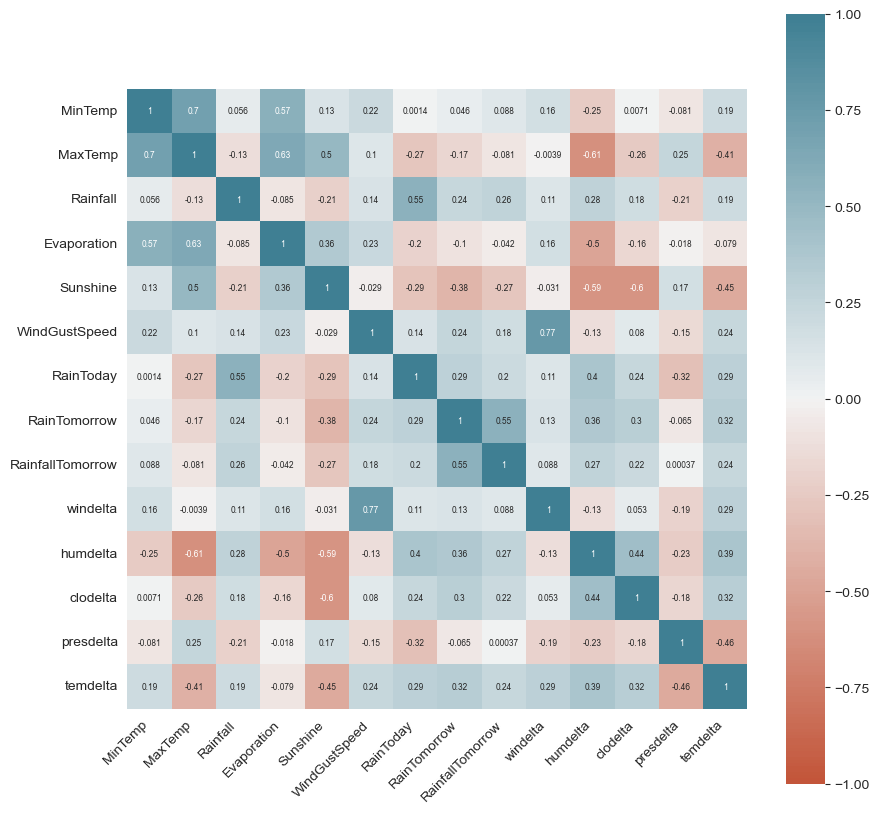

In [67]:
corr = dfm[cols_corrlog].corr()
plt.figure(figsize=(10, 10))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

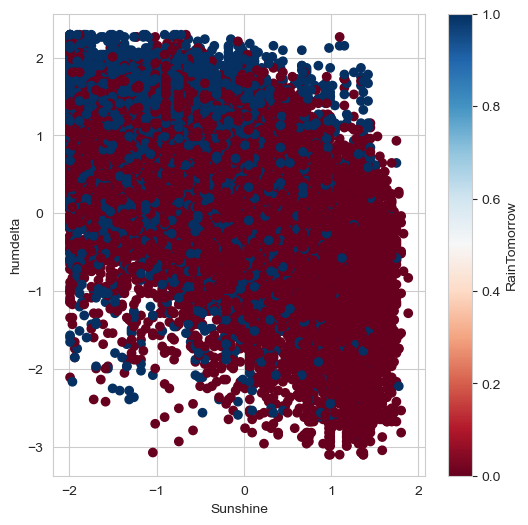

In [68]:
plt.figure(figsize=(6, 6))
sc = plt.scatter(dfm.Sunshine, dfm.humdelta, c=dfm.RainTomorrow, cmap=plt.cm.RdBu, marker='o')

# Agregar una barra de colores como leyenda
plt.colorbar(sc, label='RainTomorrow')

plt.xlabel('Sunshine')
plt.ylabel('humdelta')
plt.show()


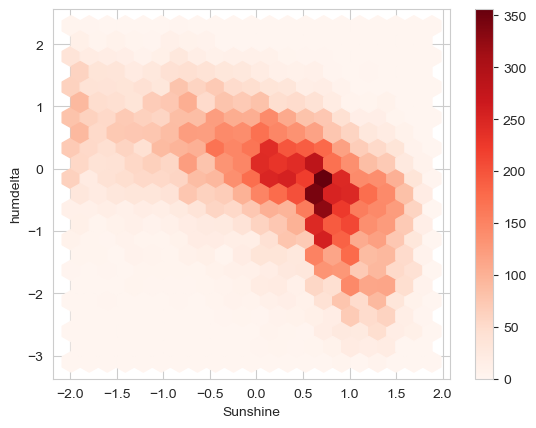

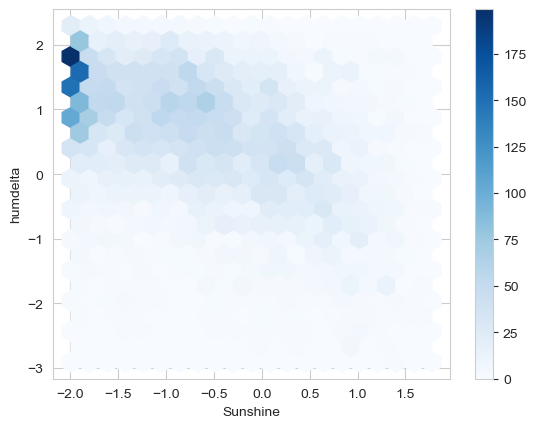

In [69]:
dfm[dfm['RainTomorrow'] == 0].plot(kind = 'hexbin', x ='Sunshine', y = 'humdelta', gridsize=20, cmap='Reds')

dfm[dfm['RainTomorrow'] == 1].plot(kind = 'hexbin', x ='Sunshine', y = 'humdelta', gridsize=20, cmap='Blues')

plt.show()

In [70]:
x_trainlg, x_testlg, y_trainlg, y_testlg = train_test_split(dfm.drop(columns = ['RainfallTomorrow','RainTomorrow'], axis=1), 
                                                    dfm['RainTomorrow'], test_size=0.2, random_state=33, stratify=dfm.RainTomorrow)

In [71]:
# Inicializar y entrenar un modelo de regresión logística
model = LogisticRegression(random_state=33)
model.fit(x_trainlg, y_trainlg)

# Realizar predicciones en el conjunto de prueba
y_predlg = model.predict(x_testlg)

In [72]:
print("Predicciones: {}, Valores actuales: {}".format(y_predlg[:5], y_testlg[:5]))

Predicciones: [0. 0. 0. 0. 1.], Valores actuales: 99066    0.0
35301    0.0
67422    0.0
83448    0.0
36220    0.0
Name: RainTomorrow, dtype: float64


In [73]:
# Obtengo las probabilidades de predicción del modelo
y_probs = model.predict_proba(x_testlg)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_testlg, y_probs)
roc_auc = auc(fpr, tpr)

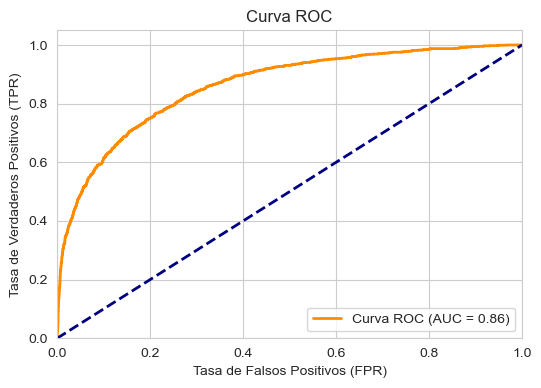

In [74]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**Area Under Curve**

Mientras más cercano esté a 1, mas clasificaciones correctas habra hecho, lo que implica graficamente que la curva ROC está más cerca de contener al punto (0,1) 

Si es 0.5, el modelo es tan malo como predecir aleatoriamente.


In [75]:
auc_score_log = roc_auc_score(y_testlg, y_probs)
print("AUC (Área bajo la Curva ROC):", auc_score_log.round(4))

AUC (Área bajo la Curva ROC): 0.86


**Accuracy**

Representa la cantidad de aciertos del modelo respecto del total de datos.

Es una buena métrica para problemas cuyos dataset están balanceados.

In [76]:
acc_log = accuracy_score(y_testlg, y_predlg)
print("Precisión del modelo:", acc_log.round(4))

Precisión del modelo: 0.8438


Con la metrica de accuracy vamos a medir los modelos de clasificacion para determinar cual es el mejor.

**Recall**

Representa, dentro de la misma clase, cuántas fueron correctamente clasificadas.

In [77]:
recallp_log = recall_score(y_testlg, y_predlg,pos_label=1)
print("Recall del modelo para la clase positiva:", recallp_log.round(4))

Recall del modelo para la clase positiva: 0.4965


In [78]:
recalln_log = recall_score(y_testlg, y_predlg, pos_label=0)
print("Recall del modelo para la clase negativa:", recalln_log.round(4))

Recall del modelo para la clase negativa: 0.9472


**Precision**

De las clases que se han clasificado como positivas, indica cuántas realmente lo son.

In [79]:
precisionp_log = precision_score(y_testlg, y_predlg, pos_label=1)
print("Precisión para la clase positiva:", precisionp_log.round(4))

Precisión para la clase positiva: 0.7365


In [80]:
precisionn_log = precision_score(y_testlg, y_predlg, pos_label=0)
print("Precisión para la clase negativa:", precisionn_log.round(4))

Precisión para la clase negativa: 0.8634


**F1 Score**

Podría ser bueno considerar una métrica que tenga en cuenta tanto la precisión como el recall.

Se utiliza una media armónica: F1 = 2 * ((recall * precision)/(recall + precision))

In [81]:
f1p_log = f1_score(y_testlg, y_predlg, pos_label=1)
print("Puntaje F1 para la clase positiva:", f1p_log.round(4))

Puntaje F1 para la clase positiva: 0.5932


In [82]:
f1n_log = f1_score(y_testlg, y_predlg,pos_label=0)
print("Puntaje F1 para la clase negativa:", f1n_log.round(4))

Puntaje F1 para la clase negativa: 0.9034


**Entropía cruzada (Cross-Entropy)**

Es útil para medir la discrepancia entre la distribución de probabilidad predicha por el modelo y la distribución real de las etiquetas. En el caso de la regresión logística, puede ser una métrica relevante para evaluar la calidad de las probabilidades predichas por el modelo.

La función de pérdida mide la discrepancia entre las distribuciones de probabilidad predichas y las distribuciones reales para un problema de clasificación binaria.
Un valor cercano a 0 implica un buen modelo, mientras mas se aleja el modelo es peor.

In [83]:
# Calcular la Entropía Cruzada (Cross-Entropy)
cross_entropy = log_loss(y_testlg, y_probs)
print("Entropía Cruzada (Cross-Entropy):", cross_entropy)

Entropía Cruzada (Cross-Entropy): 0.36754580571346956


MATRIZ

In [84]:
#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_testlg, y_predlg))

[[4122  230]
 [ 652  643]]


## MODELO BASE

### MB: REGRESION LINEAL Simple

In [85]:
x_train_mb, x_test_mb, y_train_mb, y_test_mb = train_test_split(dfm[['Sunshine']], dfm['RainfallTomorrow'], test_size=0.2, random_state=33)

In [86]:
regression_mb = LinearRegression()

regression_mb.fit(x_train_mb, y_train_mb)

y_pred_mb = regression_mb.predict(x_test_mb)

mse = mean_squared_error(y_test_mb, y_pred_mb)
print("Error cuadrático medio:", mse.round(4))

mae = mean_absolute_error(y_test_mb, y_pred_mb)
print("MAE:", mae.round(4))

regression_mb.score(x_train_mb,y_train_mb), regression_mb.score(x_test_mb, y_test_mb)
print(f"El R² para los datos de entrenamiento es: {regression_mb.score(x_train_mb,y_train_mb).round(4)} y para los de testeo: {regression_mb.score(x_test_mb,y_test_mb).round(4)}")

mape = (mae / (y_test_mb)).mean() * 100
print("MAPE:",mape.round(4))

Error cuadrático medio: 35.2409
MAE: 2.7016
El R² para los datos de entrenamiento es: 0.0746 y para los de testeo: 0.0766
MAPE: inf


El MB de regresión lineal, tiene metricas malas en comparación con nuestro modelo de mayor cantidad de columnas.

### MB: REGRESION LINEAL Mediana

In [87]:
y_pred_mb = dfm[['RainfallTomorrow']]
y_pred_mb.RainfallTomorrow = y_pred_mb.RainfallTomorrow.median()

y_test_mb = dfm['RainfallTomorrow']

In [88]:
# Metricas
mse = mean_squared_error(y_test_mb, y_pred_mb)
print("Error cuadrático medio:", mse.round(4))

mae = mean_absolute_error(y_test_mb, y_pred_mb)
print("MAE:", mae.round(4))

rs = r2_score(y_test_mb, y_pred_mb)
print(f"El R² para los datos de test: {rs.round(4)}")

mape = (mae / (y_test_mb)).mean() * 100
print("MAPE:",mape.round(4))

Error cuadrático medio: 43.3862
MAE: 1.9798
El R² para los datos de test: -0.0993
MAPE: inf
 43.3862
MAE: 1.9798
El R² para los datos de test: -0.0993
MAPE: inf


### MB: REGRESION LOGISTICA Mayoría [Datasets desbalanceados]

In [89]:
y_pred_mblg = dfm[['RainTomorrow']]
y_pred_mblg.RainTomorrow = 0

y_test_mblg = dfm['RainTomorrow']

In [90]:
# Calcular la precisión para evaluar el modelo
accuracy_mb = accuracy_score(y_test_mblg, y_pred_mblg)
print("Precisión del modelo:", accuracy_mb)

recallp_mb = recall_score(y_test_mblg, y_pred_mblg, pos_label=1)
print("Recall del modelo para la clase positiva:", recallp_mb.round(4))

recalln_mb = recall_score(y_test_mblg, y_pred_mblg, pos_label=0)
print("Recall del modelo para la clase negativa:", recalln_mb.round(4))

precisionp_mb = precision_score(y_test_mblg, y_pred_mblg, pos_label=1)
print("Precisión para la clase positiva:", precisionp_mb.round(4))

precisionn_mb = precision_score(y_test_mblg, y_pred_mblg, pos_label=0)
print("Precisión para la clase negativa:", precisionn_mb.round(4))

f1p_mb = f1_score(y_test_mblg, y_pred_mblg, pos_label=1)
print("Puntaje F1 para la clase positiva:", f1p_mb.round(4))

f1n_mb = f1_score(y_test_mblg, y_pred_mblg, pos_label=0)
print("Puntaje F1 para la clase negativa:", f1n_mb.round(4))

Precisión del modelo: 0.7707292884213509


Recall del modelo para la clase positiva: 0.0
Recall del modelo para la clase negativa: 1.0
Precisión para la clase positiva: 0.0
Precisión para la clase negativa: 0.7707
Puntaje F1 para la clase positiva: 0.0
Puntaje F1 para la clase negativa: 0.8705


## EXPLICABILIDAD

In [101]:
cols_rl = dfm.drop(columns = ['RainfallTomorrow','RainTomorrow'], axis=1).columns.values

shap.initjs()

### EXPLICABILIDAD: REGRESION LINEAL

In [165]:
x_train, x_test, y_train, y_test = train_test_split(dfm.drop(columns = ['RainfallTomorrow','RainTomorrow'], axis=1), dfm['RainfallTomorrow'], test_size=0.2, random_state=33)

In [166]:
# Array
x_test_array = x_test.values  # x_test.to_numpy()

x_train_array = x_train.values  # x_train.to_numpy()

In [167]:
# Crea un objeto explainer SHAP
explainer = shap.LinearExplainer(reg, x_train_array, feature_names=cols_rl)

In [168]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(x_test_array)

In [169]:
# (n_samples, n_features)
shap_values.shape

(5647, 81)

In [170]:
# Representa el valor promedio de la predicción del modelo cuando se consideran todas las instancias del conjunto de datos.
explainer.expected_value

1.685791015625

### INTERPRETABILIDAD LOCAL

In [178]:
index=1

reg.predict(x_test)[index]

3.050048828125

In [179]:
shap_values[index]

array([ 2.73809872e-01, -1.73323695e+00, -2.53495728e-01, -1.50598694e-01,
        1.84854912e+00, -1.29546581e+00, -1.53692265e-02,  3.61061630e-01,
        1.31442043e+00,  1.17639975e-01,  2.70303599e-01,  1.36192396e+00,
        1.14916594e+11,  8.20832811e+10,  1.14916594e+11,  9.84999374e+10,
        7.38749530e+10,  4.92499687e+10, -7.38749530e+11,  1.31333250e+11,
        7.38749530e+10,  1.90016881e+10,  1.62871613e+10,  2.44307419e+10,
        1.90016881e+10,  2.17162150e+10,  2.71452688e+10, -2.60594580e+11,
        4.88614838e+10,  1.90016881e+10,  8.14358063e+09,  3.80033763e+10,
        1.90016881e+10,  3.45323749e+10,  1.72661874e+10,  1.72661874e+10,
        1.15107916e+10,  4.02877707e+10,  2.87769791e+10,  5.75539582e+10,
        3.45323749e+10, -5.52517998e+11,  2.30215833e+10,  4.02877707e+10,
        2.87769791e+10,  5.17985623e+10,  8.05755414e+10,  3.45323749e+10,
        5.17985623e+10, -9.97362424e+10, -3.74010909e+10, -3.74010909e+10,
       -8.72692121e+10, -

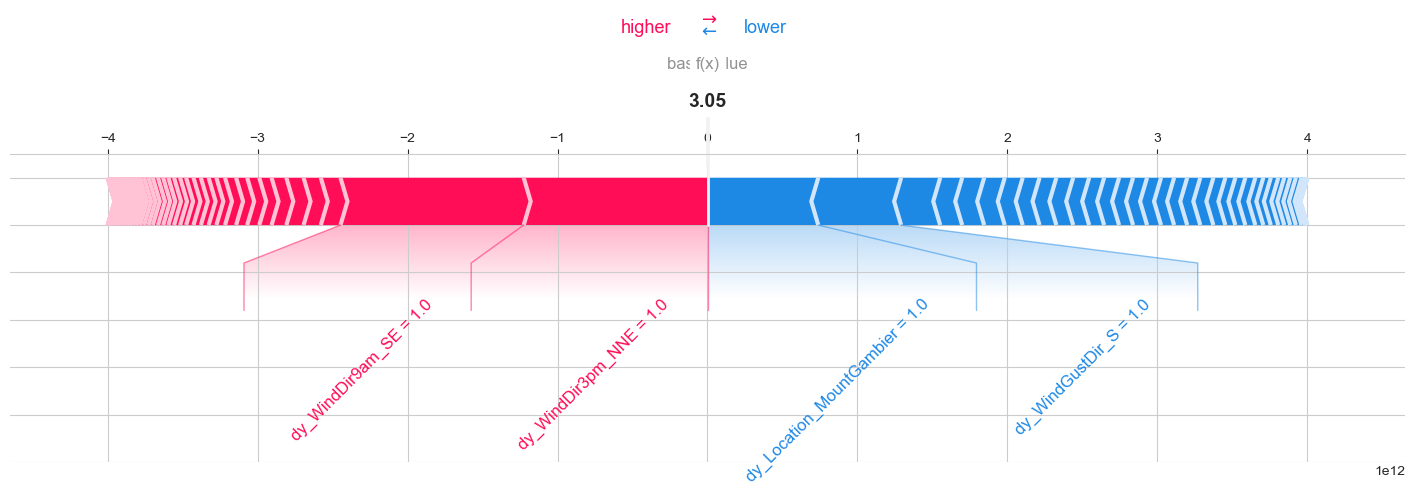

In [180]:
shap.force_plot(explainer.expected_value, shap_values[index], x_test_array[index], feature_names=cols_rl, matplotlib=True, figsize=(18, 4), text_rotation=45)

In [181]:
explanation = shap.Explanation(values=shap_values[index], base_values=explainer.expected_value, feature_names=cols_rl)

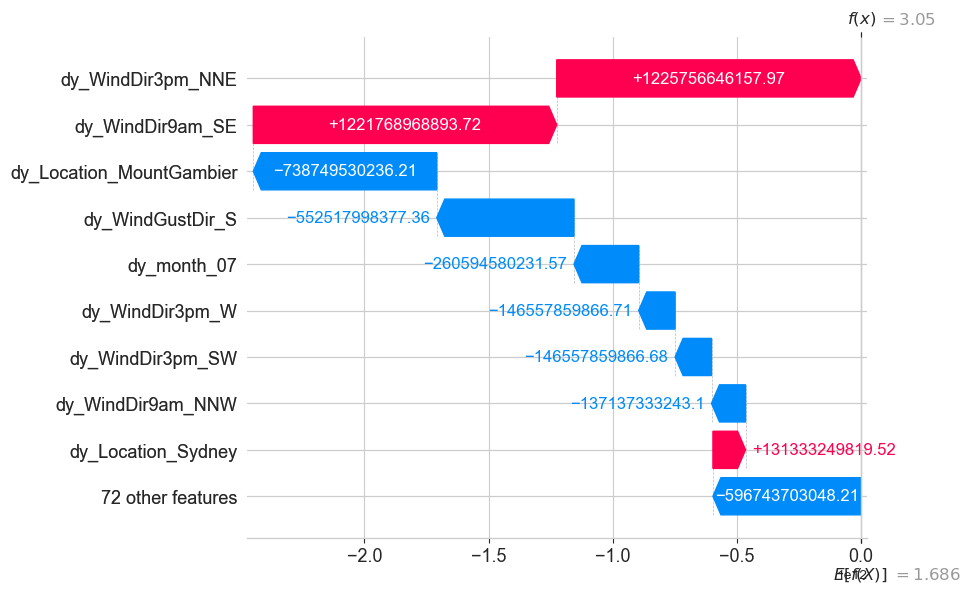

In [182]:
shap.plots.waterfall(explanation)

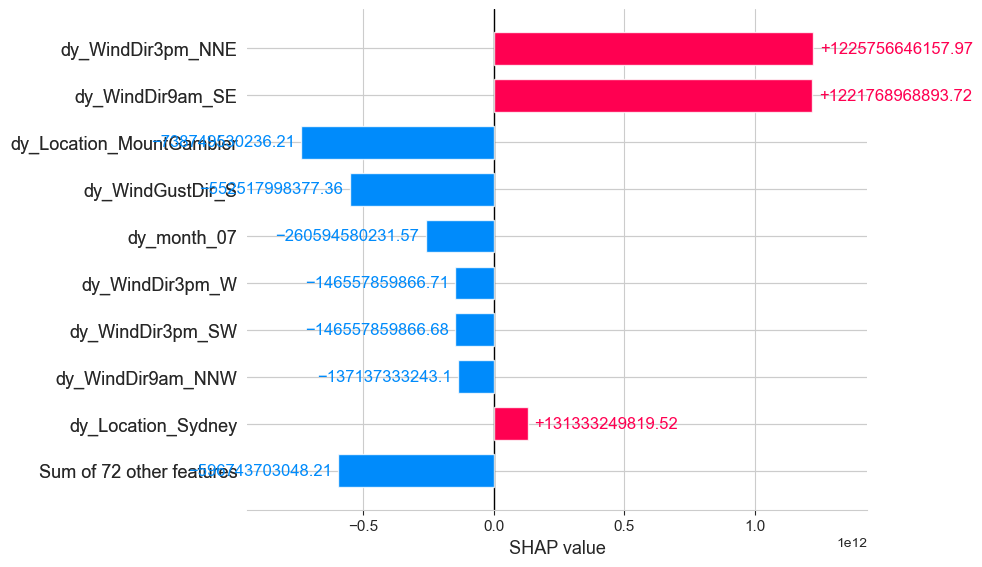

In [183]:
shap.plots.bar(explanation)

### INTERPRETABILIDAD GLOBAL

In [184]:
explanation = shap.Explanation(values = shap_values, base_values = explainer.expected_value, feature_names = cols_rl, data = x_test_array)

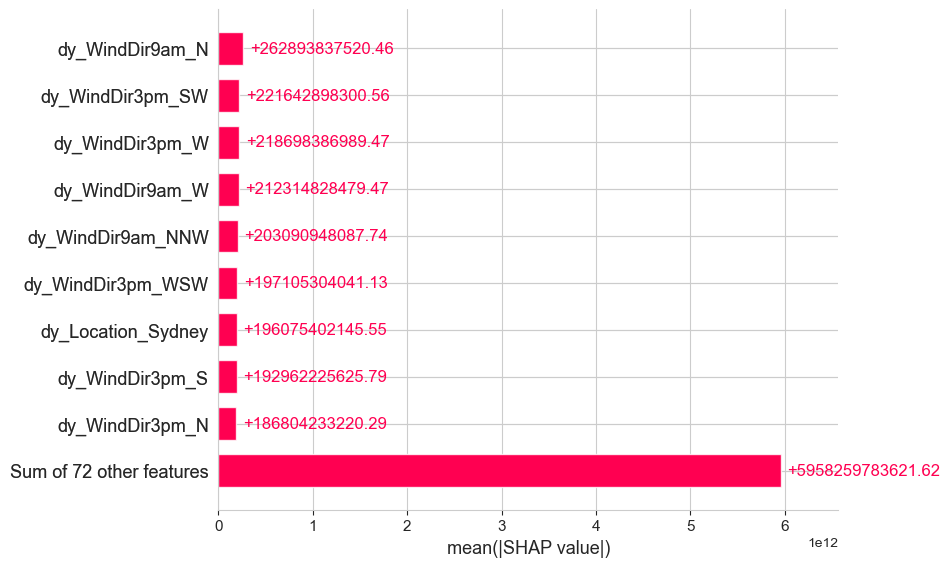

In [188]:
shap.plots.bar(explanation)

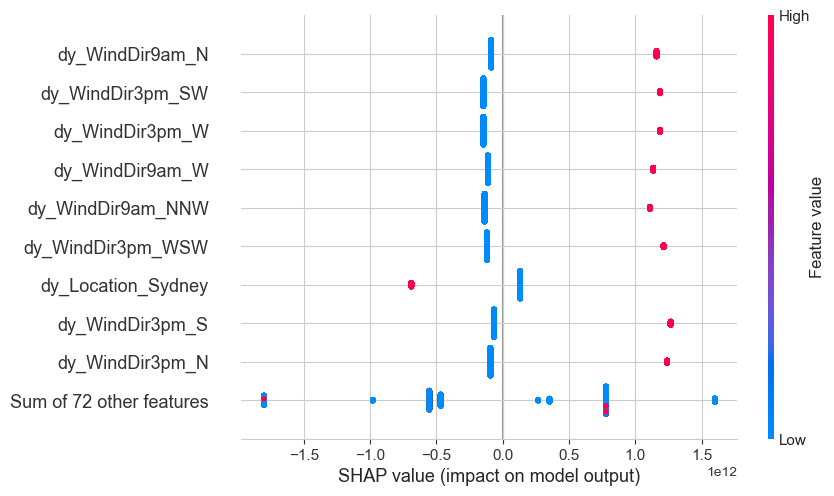

In [193]:
shap.plots.beeswarm(explanation)

### EXPLICABILIDAD: REGRESION LOGISTICA

In [194]:
x_trainlg, x_testlg, y_trainlg, y_testlg = train_test_split(dfm.drop(columns = ['RainfallTomorrow','RainTomorrow'], axis=1), 
                                                    dfm['RainTomorrow'], test_size=0.2, random_state=33, stratify=dfm.RainTomorrow)

In [ ]:
# Array
x_testlg_array = x_testlg.values  # x_test.to_numpy()

x_train_array = x_train.values  # x_train.to_numpy()

### INTERPRETABILIDAD LOCAL

### INTERPRETABILIDAD GLOBAL